In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
### Read CSV into pandas dataframe and parse dates
#df = pd.read_csv('https://www.techism.de/static/export/techism-events.csv', parse_dates=['date_time_begin', 'date_time_end'])
df = pd.read_csv('techism-events.csv', parse_dates=['date_time_begin', 'date_time_end'])

In [3]:
### Play with dataframe
#df.head()
#df.columns
#df.dtypes
#df.ix[1]

In [4]:
### Statistics about columns
#df.location_lat.describe()
#df.location_lng.describe()
#df.date_time_begin.describe()
#df.date_time_end.describe()
#df.title.describe()

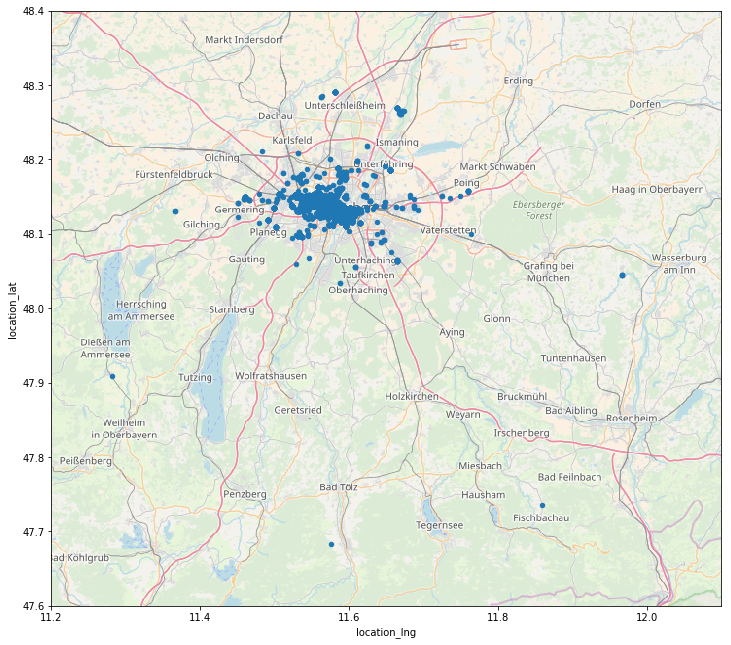

In [5]:
### Visualize geo coordinates
#df.location_lat.hist()
#df.location_lng.hist()
#df.iloc[df.location_lng.idxmax()]
df.plot.scatter(x='location_lng', y='location_lat', figsize=(12,12));
munich_img=mpimg.imread('munich.png')
plt.imshow(munich_img, extent=[11.2, 12.1, 47.6, 48.4], alpha=0.8)

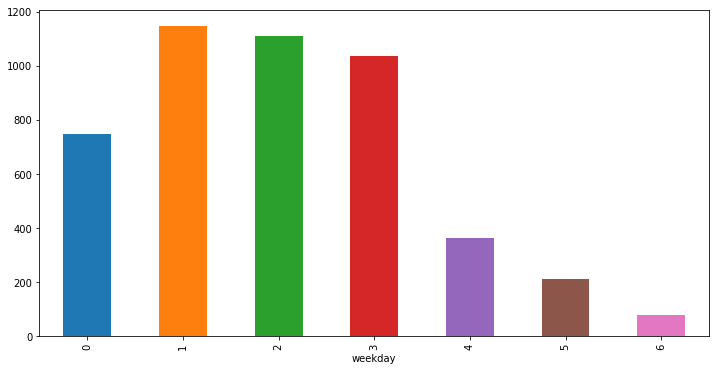

In [6]:
### Number of events per weekday
df['weekday'] = df.date_time_begin.dt.weekday
df['weekday_name'] = df.date_time_begin.dt.weekday_name
wd = df.groupby('weekday')['title'].count()
wd.plot(kind='bar', figsize=(12,6))

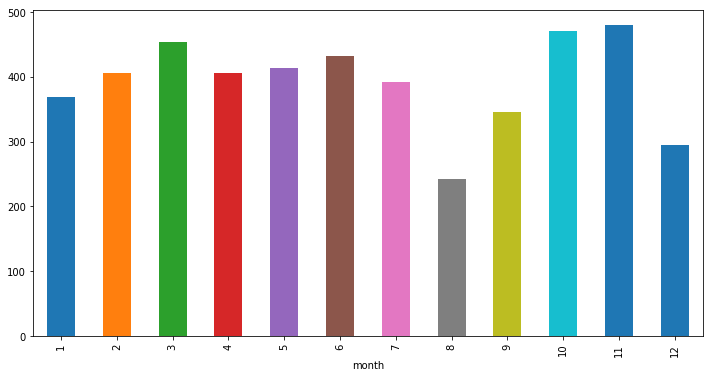

In [7]:
### Number of events per month
df['month'] = df.date_time_begin.dt.month
m = df.groupby('month')['title'].count()
m.plot(kind='bar', figsize=(12,6))

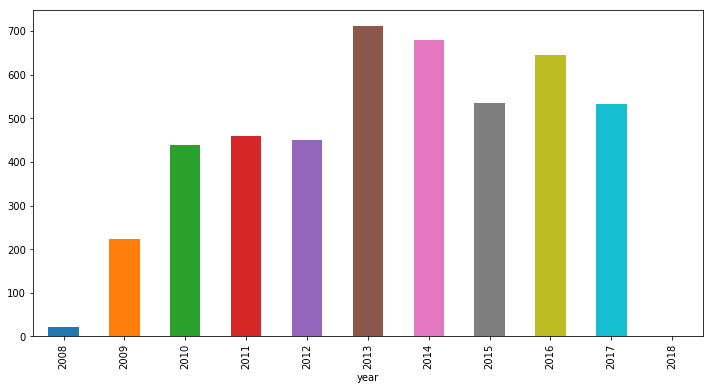

In [8]:
### Number of events per year
df['year'] = df.date_time_begin.dt.year
y = df.groupby('year')['title'].count()
y.plot(kind='bar', figsize=(12,6))

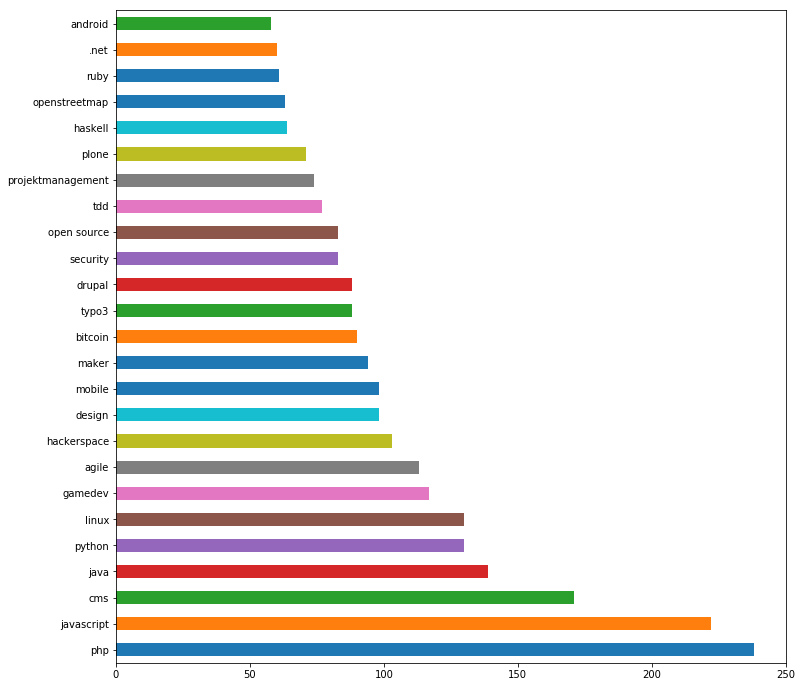

In [9]:
### Tag usage
### Source: https://stackoverflow.com/questions/17116814/pandas-how-do-i-split-text-in-a-column-into-multiple-rows
tag = df['tags'].str.split('|').apply(Series, 1).stack()
tag.index = tag.index.droplevel(-1)
tag.name = 'tag'
df2 = df.join(tag)
df2['tag'].value_counts().nlargest(25).plot(kind='barh', figsize=(12,12))

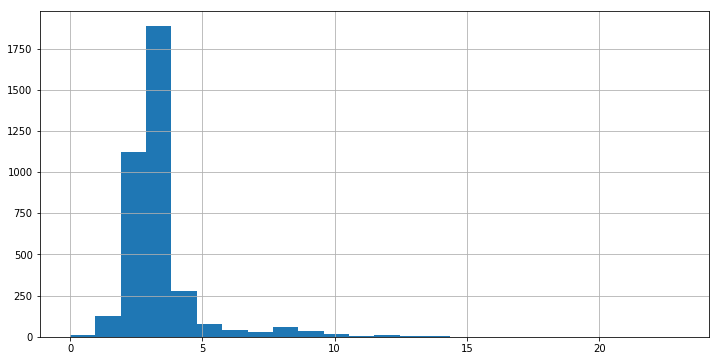

In [10]:
### Duration of an event in hours (only events < 24 h)
df['duration'] = (df.date_time_end - df.date_time_begin).astype('timedelta64[h]')
#df['duration'] = df['duration'].fillna(3)
df['duration'].describe()
df[df['duration']<24]['duration'].hist(bins=24, figsize=(12,6))